In [1]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
Using TensorFlow backend.


In [2]:
def graficar_predicciones(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Casos')
    plt.legend()
    plt.show()

In [5]:
dataset = pd.read_csv('COVID19Col.csv', index_col='Fecha de notificación', parse_dates=['Fecha de notificación'])
dataset.head()

,ID de caso,Codigo DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación
Fecha de notificación,,,,,,,,,,,,,,,,
2020-03-02,1,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,Italia,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR
2020-03-06,2,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,España,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR
2020-03-07,3,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,España,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR
2020-03-09,4,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,Colombia,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR
2020-03-09,5,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,Colombia,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR


In [9]:
set_entrenamiento = dataset[:'2020-05'].iloc[:,0:1]
set_validacion = dataset['2020-06':].iloc[:,0:1]
set_entrenamiento.head()

,ID de caso
Fecha de notificación,
2020-03-02,1
2020-03-06,2
2020-03-07,3
2020-03-09,4
2020-03-09,5


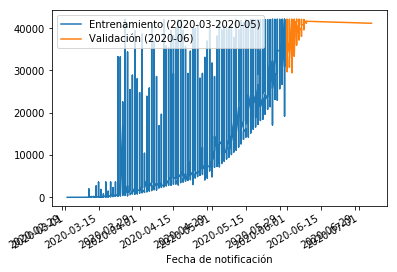

In [10]:
set_entrenamiento['ID de caso'].plot(legend=True)
set_validacion['ID de caso'].plot(legend=True)
plt.legend(['Entrenamiento (2020-03-2020-05)', 'Validación (2020-06)'])
plt.show()

In [11]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

In [13]:
for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='SGD', loss='mse')
modelo.fit(X_train,Y_train,epochs=6,batch_size=30)

Epoch 1/6
36123/36123 [==============================] - 201s 6ms/step - loss: 0.0053
Epoch 2/6
36123/36123 [==============================] - 180s 5ms/step - loss: 1.0960e-04
Epoch 3/6
36123/36123 [==============================] - 179s 5ms/step - loss: 8.4862e-05
Epoch 4/6
36123/36123 [==============================] - 184s 5ms/step - loss: 6.7325e-05
Epoch 5/6
36123/36123 [==============================] - 186s 5ms/step - loss: 5.4449e-05 0s - loss: 5.4467e-
Epoch 6/6
36123/36123 [==============================] - 186s 5ms/step - loss: 4.4720e-05


In [50]:
x_test = set_validacion.values

x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
print(set_validacion)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

                       ID de caso
Fecha de notificación            
2020-06-03                  29488
2020-06-01                  29729
2020-06-01                  29730
2020-06-01                  29752
2020-06-01                  29978
2020-06-01                  30140
2020-06-01                  30141
2020-06-01                  30142
2020-06-01                  30143
2020-06-01                  30144
2020-06-01                  30145
2020-06-01                  30146
2020-06-01                  30147
2020-06-01                  30148
2020-06-01                  30540
2020-06-01                  30542
2020-06-01                  30549
2020-06-01                  30550
2020-06-01                  30551
2020-06-01                  30552
2020-06-01                  30553
2020-06-01                  30554
2020-06-01                  30562
2020-06-01                  30569
2020-06-01                  30585
2020-06-01                  30587
2020-06-01                  30603
2020-06-01    

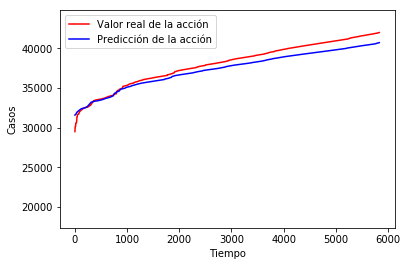

In [17]:
graficar_predicciones(set_validacion.values,prediccion)

In [47]:
set_validacion.head()


,ID de caso
Fecha de notificación,
2020-06-03,29488
2020-06-01,29729
2020-06-01,29730
2020-06-01,29752
2020-06-01,29978
